# Redes neuronales simples
Este notebook compara tres arquitecturas básicas:
- Red de 1 capa (binaria)
- Red de 2 capas (binaria)
- Red de 2 capas (multiclase)

Se utilizan datasets sintéticos y se grafican los resultados.

## Dataset binario sintético

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelo 1: Red de una capa (clasificación binaria)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Modelo 2: Red de dos capas (clasificación binaria)

In [3]:
model_2 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

## Dataset multiclase sintético

In [4]:
X_mc, y_mc = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=42)
X_mc_train, X_mc_test, y_mc_train, y_mc_test = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)
scaler_mc = StandardScaler()
X_mc_train = scaler_mc.fit_transform(X_mc_train)
X_mc_test = scaler_mc.transform(X_mc_test)

from tensorflow.keras.utils import to_categorical
y_mc_train_cat = to_categorical(y_mc_train)
y_mc_test_cat = to_categorical(y_mc_test)

### Modelo 3: Red de dos capas (clasificación multiclase)

In [5]:
model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(X_mc_train.shape[1],)),
    Dense(3, activation='softmax')
])
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X_mc_train, y_mc_train_cat, epochs=20, batch_size=32, validation_data=(X_mc_test, y_mc_test_cat), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Comparativa de precisión en validación

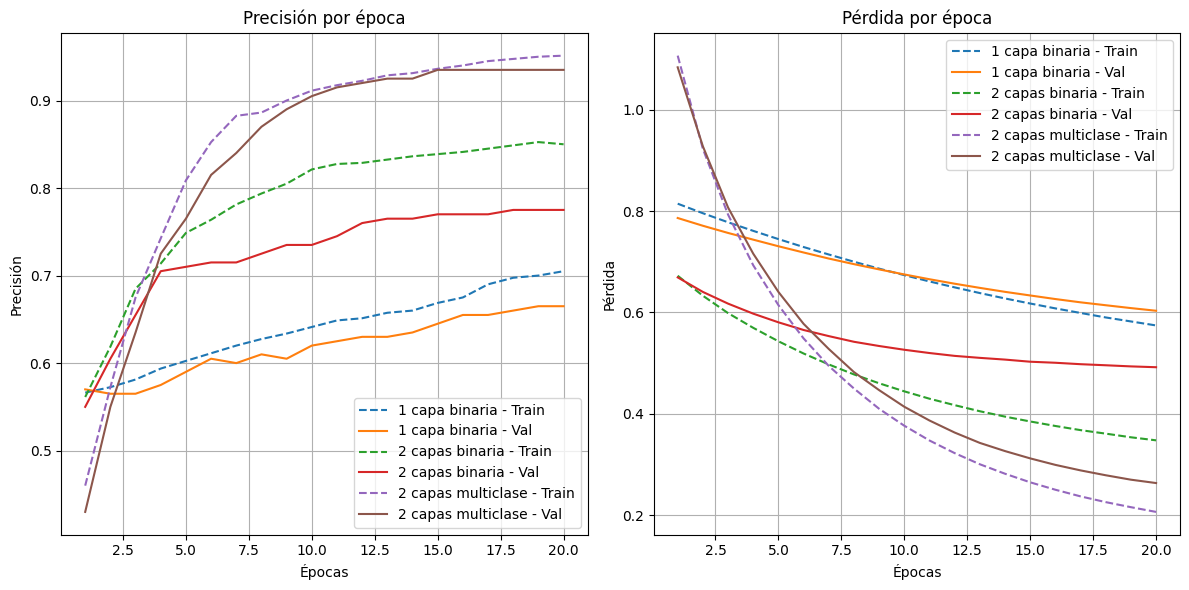

In [6]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_1.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history_1.history['accuracy'], label='1 capa binaria - Train', linestyle='--')
plt.plot(epochs, history_1.history['val_accuracy'], label='1 capa binaria - Val')
plt.plot(epochs, history_2.history['accuracy'], label='2 capas binaria - Train', linestyle='--')
plt.plot(epochs, history_2.history['val_accuracy'], label='2 capas binaria - Val')
plt.plot(epochs, history_3.history['accuracy'], label='2 capas multiclase - Train', linestyle='--')
plt.plot(epochs, history_3.history['val_accuracy'], label='2 capas multiclase - Val')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_1.history['loss'], label='1 capa binaria - Train', linestyle='--')
plt.plot(epochs, history_1.history['val_loss'], label='1 capa binaria - Val')
plt.plot(epochs, history_2.history['loss'], label='2 capas binaria - Train', linestyle='--')
plt.plot(epochs, history_2.history['val_loss'], label='2 capas binaria - Val')
plt.plot(epochs, history_3.history['loss'], label='2 capas multiclase - Train', linestyle='--')
plt.plot(epochs, history_3.history['val_loss'], label='2 capas multiclase - Val')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.legend()
plt.savefig('01_acc_loss.png')

plt.tight_layout()
plt.show()
